## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


### Api Key

In [2]:
client_id = 'hQmW_N-oAuBKvmHmmF5Ltg'
api_key = '-xfnZF7NwPGrMpJUEY99Oc9hL_zP4B8l5oB7OYkTsHsl1FsfAteGNT_uHWay_CFD_a90yoD7bvqgugeJmQq_iyu0K9Ks1n8_zzEiskRRQQHdO3xXFemvf2loxA07XXYx'

## Helper Functions

In [3]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [4]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [5]:
#Params
term = 'Restaurants'
location = '10461'
radius = 20000
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50,
                'radius': radius
             }

In [29]:
## API Call for 1000 Restaurants

In [6]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

7600 total matches found.
20


In [7]:
all_restaurants[0][0]

{'id': 'ba-MPbYnM6T30RNgPdUvtQ',
 'alias': 'shanghai-red-asian-latin-bistro-bronx-2',
 'name': 'Shanghai Red Asian Latin Bistro',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ygm5bjAuAhWOhhafsmwKgA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/shanghai-red-asian-latin-bistro-bronx-2?adjust_creative=hQmW_N-oAuBKvmHmmF5Ltg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=hQmW_N-oAuBKvmHmmF5Ltg',
 'review_count': 54,
 'categories': [{'alias': 'asianfusion', 'title': 'Asian Fusion'}],
 'rating': 4.0,
 'coordinates': {'latitude': 40.8401620296024, 'longitude': -73.8425095552948},
 'transactions': ['delivery', 'restaurant_reservation', 'pickup'],
 'price': '$$',
 'location': {'address1': '127 Westchester Sq',
  'address2': '',
  'address3': None,
  'city': 'Bronx',
  'zip_code': '10461',
  'country': 'US',
  'state': 'NY',
  'display_address': ['127 Westchester Sq', 'Bronx, NY 10461']},
 'phone': '+17186846262',
 'display_phone': '(718) 684-626

## Parse API Data for Relevant Info

In [11]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'], 'city': parsed_restaurant['location']['city'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'], 'city': parsed_restaurant['location']['city'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [12]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [13]:
len(parsed_restaurants_v1)

1000

In [14]:
parsed_restaurants_v1

[{'restaurant_id': 'ba-MPbYnM6T30RNgPdUvtQ',
  'restaurant_name': 'Shanghai Red Asian Latin Bistro',
  'price': '$$',
  'rating': 4.0,
  'city': 'Bronx',
  'review_count': 54},
 {'restaurant_id': '03RL_VcRGXuICl2R6Luu_Q',
  'restaurant_name': 'The Waterfront NYC',
  'city': 'Bronx',
  'price': '',
  'rating': 4.5,
  'review_count': 11},
 {'restaurant_id': 'P8PGGzxZeMm6Na5gYqvudw',
  'restaurant_name': 'Travesias',
  'price': '$$',
  'rating': 4.0,
  'city': 'Bronx',
  'review_count': 469},
 {'restaurant_id': '2f-qNpdVJl2h9L6SHYuICA',
  'restaurant_name': 'Havana Cafe',
  'price': '$$',
  'rating': 4.0,
  'city': 'Bronx',
  'review_count': 765},
 {'restaurant_id': 'm6p_huTMlmMvUNkxDL1YCQ',
  'restaurant_name': 'Havana Cafe',
  'price': '$$',
  'rating': 4.0,
  'city': 'Bronx',
  'review_count': 172},
 {'restaurant_id': 'b6jOwyX4iaagw8YjXqq1sA',
  'restaurant_name': "Antonio's Trattoria",
  'price': '$$',
  'rating': 4.5,
  'city': 'Bronx',
  'review_count': 743},
 {'restaurant_id': 'BiO

In [15]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [16]:
df.head()

,city,price,rating,restaurant_id,restaurant_name,review_count
0,Bronx,$$,4.0,ba-MPbYnM6T30RNgPdUvtQ,Shanghai Red Asian Latin Bistro,54
1,Bronx,,4.5,03RL_VcRGXuICl2R6Luu_Q,The Waterfront NYC,11
2,Bronx,$$,4.0,P8PGGzxZeMm6Na5gYqvudw,Travesias,469
3,Bronx,$$,4.0,2f-qNpdVJl2h9L6SHYuICA,Havana Cafe,765
4,Bronx,$$,4.0,m6p_huTMlmMvUNkxDL1YCQ,Havana Cafe,172


In [17]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_Bronx.xlsx")

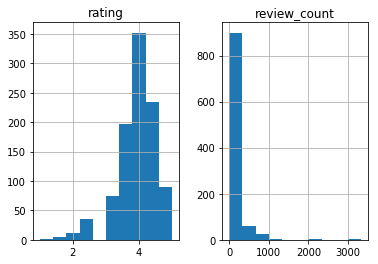

In [18]:
df.hist()
plt.show()

### Prepping for Full Scrape

In [19]:
df = pd.read_csv('Restaurant_Bronx.xlsx')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2


In [20]:
restaurant_id_list = list(df.restaurant_id)

In [21]:
restaurant_id_list

['ba-MPbYnM6T30RNgPdUvtQ',
 '03RL_VcRGXuICl2R6Luu_Q',
 'P8PGGzxZeMm6Na5gYqvudw',
 '2f-qNpdVJl2h9L6SHYuICA',
 'm6p_huTMlmMvUNkxDL1YCQ',
 'b6jOwyX4iaagw8YjXqq1sA',
 'BiOgIv7Nj3oDrJTHiDt45g',
 'hVIejxln5ouANt854EdeYQ',
 'ZZxYVgodx2TxbYwh-0YU1w',
 'By2Zl1imtu0SpA4IBziN1g',
 '7Qv-M5VzwxBkpH7ZOeoJgQ',
 'CY1lJBQatCNo4-_ljlS1rA',
 'LXOvAoDO9QomXlvYdc0rrQ',
 '-5JwknVLIT36YTGhvkuBaw',
 '9CMlqg0iZgYMlyUN9iroeg',
 'KAxYFGyOQ7ysCmYmh8jKtw',
 'DLnn2qw-KJAmazB-hMmSEw',
 'QpH6TCCJy8tdAoMq30LXbA',
 '60M7dk6cX6QCHAiGqB1GLg',
 'uthkinOdYCrM0j-5tYC63w',
 'T_72OxeFKvdzX-mKEztHdQ',
 'xAFXagBZ_JbYsAkw-gS-Hg',
 'sri-S6YRQ32XsvdO-EB3IA',
 'eQdjZQaLnjItmn9suEEeIA',
 'D8z7FS2SB48zTjvch4bc0g',
 'xJsMwZi0n4zj7VVylxaedQ',
 'phB6HvQyOUEZmvgg9KzRmA',
 'TXjvmpAl7otZcuk_7hYZ2g',
 'L6uNqeWT1Ay4r4biMenUuA',
 '9l5KqSTju9-yX8qmqnNkwg',
 'jWuUibgnTGsJibOrr6UUSw',
 'Km_hSBftgdYcGL1TzZnwlQ',
 'rN347NNwQ0hDSlbedzI9BQ',
 'L1FHDJoEJq42x2NJNA3mng',
 'Lesv5BG0_0-8bB49cAjMkg',
 'hLm1vXfAKuSOgAtBA-vO7w',
 '0p6W9PtbvBkOl7VBmUZciw',
 

## Test Scrape for 1 Restaurant

In [22]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'ba-MPbYnM6T30RNgPdUvtQ'
full_url = url_prefix+test_id+url_suffix

In [23]:
full_url

'https://www.yelp.com/biz/ba-MPbYnM6T30RNgPdUvtQ?rh_type=phrase'

In [24]:
source = requests.get(full_url).text

In [25]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [26]:
soup = BeautifulSoup(source,'lxml')

In [27]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [28]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [29]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">Ok so imma start with a Thank You to my waitress Cynthia and the Manager Mae for their great recommendations. <br/><br/>This was my first time here and I was not disappointed.<br/>I'm a very picky eater so for me to go to a Latin Asian Fusion restuarant I was praying the food would be great.<br/>I follow you'll on IG and seeing the pictures of the food I was like I have to go there.<br/>As soon as I walked in I was greated and seated right away.<br/><br/>So to get to my delicious food.<br/>To start my meal off i had the Lycheetini, now I've never eaten or drank anything lychee.<br/>The mix of the vodka, lychee puree and the coconut puree was just masterful.<br/>The creaminess of the purees with the vodka was just .<br/>Mae recommended the Eel Roll and Cynthia recommended the Lycheetini.<br/>So I went with the Eel Roll and The Shrinp Tempura Roll.<br/>The sauce that came on the plates of the rolls was a great balance of sweetness to the 

In [30]:
reviews_section.text

"Ok so imma start with a Thank You to my waitress Cynthia and the Manager Mae for their great recommendations. This was my first time here and I was not disappointed.I'm a very picky eater so for me to go to a Latin Asian Fusion restuarant I was praying the food would be great.I follow you'll on IG and seeing the pictures of the food I was like I have to go there.As soon as I walked in I was greated and seated right away.So to get to my delicious food.To start my meal off i had the Lycheetini, now I've never eaten or drank anything lychee.The mix of the vodka, lychee puree and the coconut puree was just masterful.The creaminess of the purees with the vodka was just .Mae recommended the Eel Roll and Cynthia recommended the Lycheetini.So I went with the Eel Roll and The Shrinp Tempura Roll.The sauce that came on the plates of the rolls was a great balance of sweetness to the rolls, I was ready to lick the plate clean lol.I've never eaten Eel before to for this to be my first time I was n

In [31]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">Ok so imma start with a Thank You to my waitress Cynthia and the Manager Mae for their great recommendations. <br/><br/>This was my first time here and I was not disappointed.<br/>I'm a very picky eater so for me to go to a Latin Asian Fusion restuarant I was praying the food would be great.<br/>I follow you'll on IG and seeing the pictures of the food I was like I have to go there.<br/>As soon as I walked in I was greated and seated right away.<br/><br/>So to get to my delicious food.<br/>To start my meal off i had the Lycheetini, now I've never eaten or drank anything lychee.<br/>The mix of the vodka, lychee puree and the coconut puree was just masterful.<br/>The creaminess of the purees with the vodka was just .<br/>Mae recommended the Eel Roll and Cynthia recommended the Lycheetini.<br/>So I went with the Eel Roll and The Shrinp Tempura Roll.<br/>The sauce that came on the plates of the rolls was a great balance of sweetness to the

## Scrape for All 1000 Restaurants

In [32]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [33]:
reviews

[{0: "Ok so imma start with a Thank You to my waitress Cynthia and the Manager Mae for their great recommendations. This was my first time here and I was not disappointed.I'm a very picky eater so for me to go to a Latin Asian Fusion restuarant I was praying the food would be great.I follow you'll on IG and seeing the pictures of the food I was like I have to go there.As soon as I walked in I was greated and seated right away.So to get to my delicious food.To start my meal off i had the Lycheetini, now I've never eaten or drank anything lychee.The mix of the vodka, lychee puree and the coconut puree was just masterful.The creaminess of the purees with the vodka was just .Mae recommended the Eel Roll and Cynthia recommended the Lycheetini.So I went with the Eel Roll and The Shrinp Tempura Roll.The sauce that came on the plates of the rolls was a great balance of sweetness to the rolls, I was ready to lick the plate clean lol.I've never eaten Eel before to for this to be my first time I 

In [50]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            time.sleep(1)
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop5.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [63]:
full_reviews = scrape_list(restaurant_id_list[593:])





  0%|          | 0/450 [00:00<?, ?it/s]



  0%|          | 1/450 [00:34<4:14:28, 34.01s/it]



  0%|          | 2/450 [01:06<4:11:20, 33.66s/it]



  1%|          | 3/450 [01:35<3:59:17, 32.12s/it]



  1%|          | 4/450 [02:08<4:00:42, 32.38s/it]



  1%|          | 5/450 [02:41<4:02:42, 32.73s/it]



  1%|▏         | 6/450 [03:08<3:48:58, 30.94s/it]



  2%|▏         | 7/450 [03:37<3:44:37, 30.42s/it]



  2%|▏         | 8/450 [04:11<3:51:04, 31.37s/it]



  2%|▏         | 9/450 [04:54<4:16:00, 34.83s/it]



  2%|▏         | 10/450 [05:24<4:05:26, 33.47s/it]



  2%|▏         | 11/450 [05:52<3:52:39, 31.80s/it]



  3%|▎         | 12/450 [06:25<3:54:08, 32.07s/it]



  3%|▎         | 13/450 [06:55<3:49:47, 31.55s/it]



  3%|▎         | 14/450 [07:30<3:56:01, 32.48s/it]



  3%|▎         | 15/450 [08:07<4:06:16, 33.97s/it]



  4%|▎         | 16/450 [08:31<3:43:44, 30.93s/it]



  4%|▍         | 17/450 [09:00<3:38:31, 30.28s/it]



  4%|▍         | 18/450 [09:25<3:26:19, 28.6

KeyboardInterrupt: 

In [64]:
with open("reviews_loop5.pkl",'rb') as fp:
    ts = pickle.load(fp)

In [65]:
type(ts)

list

In [66]:
df = pd.DataFrame(ts)

In [67]:
df.tail()

,0,1
2214,IZaIOOUNnZV2kgabfpwfFA,"Parking can be difficult when it gets crowded,..."
2215,IZaIOOUNnZV2kgabfpwfFA,"Literally the best buffet, ever. It's very nic..."
2216,IZaIOOUNnZV2kgabfpwfFA,With all the Chinese Buffet I have visited thr...
2217,IZaIOOUNnZV2kgabfpwfFA,This legit should be zero stars but thats not ...
2218,IZaIOOUNnZV2kgabfpwfFA,Came here cause I heard good things from Famil...


In [68]:
df.to_csv('bronx2ndbit.csv')

In [69]:
restaurant_id_list.index('IZaIOOUNnZV2kgabfpwfFA')

593

In [52]:
len(full_reviews)

NameError: name 'full_reviews' is not defined

In [35]:
full_reviews

[('jWuUibgnTGsJibOrr6UUSw',
  'I had my first Haidilao experience 18 years ago, to me this remains best hotpot place in the world since then. Even with more and more hotpot brands popping up in China nowadays, I still think Haidilao is THE BEST among them all - the food, the service, the amenities, etc. I was so excited to learn that Haidilao is coming to NYC eventually. My BF made the reservation a month ago and we finally gets to try it today. It is really good, from every aspect.We ordered the soup base with four different flavors, tomato and spicy oil soup base are my all time favorite. The hotpot tastes pretty much like what I had back in China, maybe the tomato soup base is slightly more diluted than what I had in China, but I\'m glad they did not "tailor the flavor" to accompany the US market, which is what happened to their first LA restaurant - yes I went to their first LA restaurant too when it opened and was very disappointed at what they did to make Haidilao "Americanized".

## Save Data

In [36]:
import pickle
 
with open('reviews_v3.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [37]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [38]:
data.to_csv('reviews_queens.csv')